# Titanic Dateset Exploration
## by Mohie Eldeen Elzeiny

## Investigation Overview

> simply, our main goal is to explore the dataset and answer that question : “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). 

## Dataset Overview

> On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. The sinking of the Titanic is one of the most infamous shipwrecks in history. since then, data has been gathered. data about every passenger was on the titanic(names, ages , class ...etc) and offcourse the final fate of every one of them.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
#reading the CSV files
titanic = pd.read_csv('titanic.csv')
titanic['Title'] = titanic['Name'].str.extract('([A-Za-z]+)\.')
titanic.Age.fillna( titanic.groupby('Title')['Age'].transform('median') , inplace = True)
titanic['Embarked'].fillna('S' , inplace = True)
titanic.drop(['PassengerId' , 'Name' , 'Ticket' , 'Cabin'] , axis = 1 , inplace = True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> well at first, the data we have is a skewed and not balanced that we have about 38% survival rate!

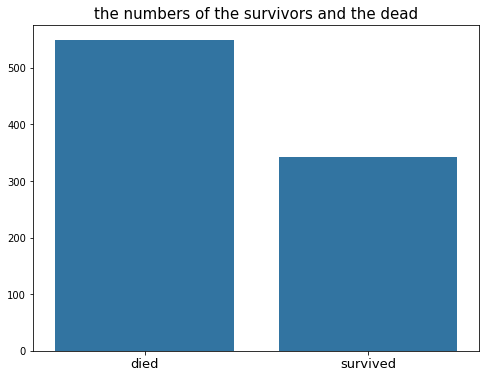

In [22]:
#looking the at the survival rate
x = titanic.Survived.value_counts().index
y = titanic.Survived.value_counts()
plt.figure(figsize= (8,6))
sb.barplot( x = x , y = y , color = sb.color_palette()[0]);
plt.xticks([0,1] , ['died' , 'survived'] , size= 13);
plt.ylabel("");
plt.title("the numbers of the survivors and the dead" , size = 15);

## (Visualization 2)

> the distribution of the age is right skewed and that's not very normal shape. but from that we know that nost of the passengers are from 15 to about 50 years old

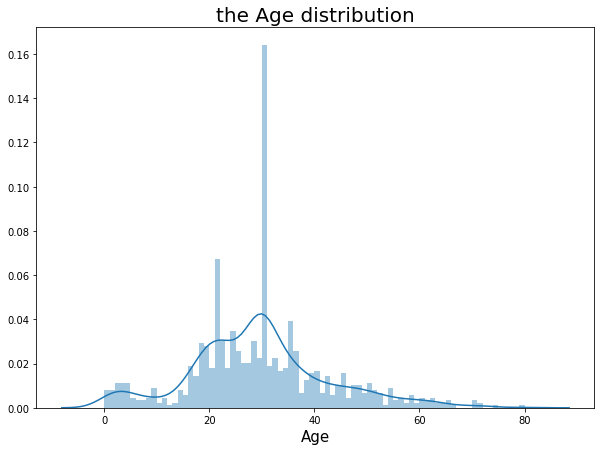

In [17]:
# the age distribution
bins = np.arange(0 , 80+1 ,1)
plt.figure(figsize= (10,7))
sb.distplot(titanic.Age , bins = bins  );
plt.xlabel('Age',size= 15);
plt.title('the Age distribution', size = 20) ;

## (Visualization 3)

>the ratio of men is roughly twice the ratio of women

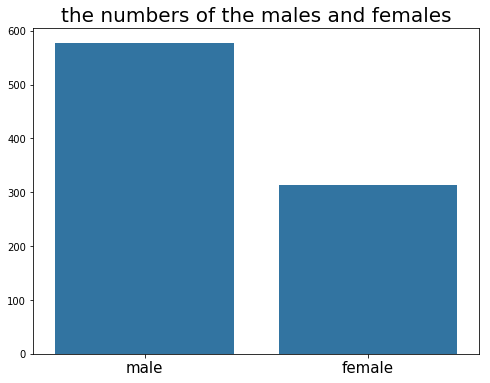

In [21]:
#looking at the ratio between males and females
x = titanic.Sex.value_counts().index
y = titanic.Sex.value_counts()
plt.figure(figsize= (8,6))
sb.barplot( x = x , y = y , color = sb.color_palette()[0]);
plt.ylabel("")
plt.xticks(size = 15)
plt.title("the numbers of the males and females" , size = 20);

## (Visualization 4)
>the ratio of the third class is 55% which is more than the first and second class added together

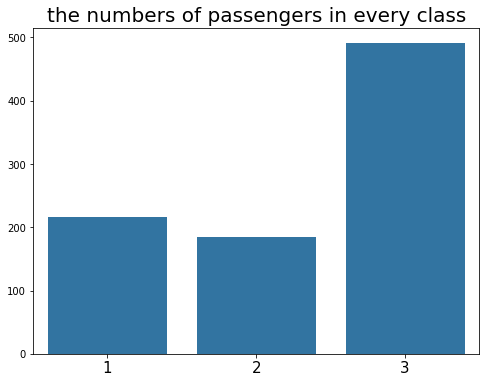

In [23]:
#looking at the ratios of classes
x = titanic.Pclass.value_counts().index
y = titanic.Pclass.value_counts()
plt.figure(figsize= (8,6))
sb.barplot( x = x , y = y , color = sb.color_palette()[0]);
plt.ylabel("")
plt.xticks(size = 15)
plt.title("the numbers of passengers in every class" , size = 20);

## (Visualization 5)
> there's a difference betweed the two distributions on the width of the spikes. it's more likly to die if the passenger more than 60 and more likely to survive if less than 10 but there's not much to say between the two ages. the box plots are nearly the same so I think may be that difference of the distributions is only because the two rate of survival and death aren't the same in the fisrt place

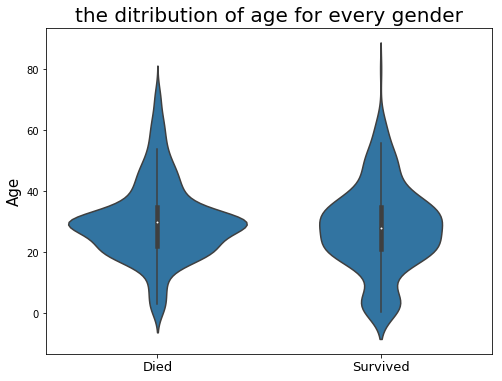

In [28]:
#the relation between the age and the survival rate
plt.figure(figsize= (8,6))
sb.violinplot(data = titanic , x = 'Survived' , y = 'Age' , color = sb.color_palette()[0])

plt.ylabel("Age" , size = 15)
plt.xlabel("")
plt.xticks([0,1] , ['Died', 'Survived'] , size = 13);
plt.title("the ditribution of age for every gender" , size = 20);

## (Visualization 6)
> even though the number of men is twice the number of women but the women that survived are even more than twice the number of men that survived.... it wasn't only jack who sacrificed himself I think

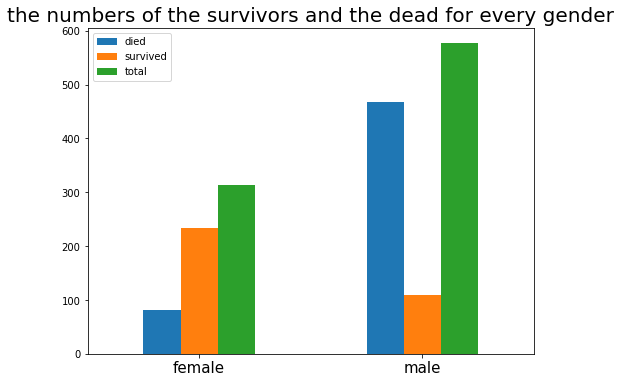

In [31]:
#making a small data frame to have the numbers that survived or died for each gender plus the total number
sex_sur = titanic.groupby('Survived')['Sex'].value_counts().unstack()
sex_sur = sex_sur.transpose()
sex_sur['total'] = sex_sur.sum(axis = 1)

#making the bar graph
sex_sur.plot(kind = 'bar' , figsize= (8,6))
plt.xticks(size = 15 , rotation = 0);
plt.legend(['died' , 'survived' , 'total'])
plt.xlabel("")
plt.title("the numbers of the survivors and the dead for every gender" , size = 20);

## (Visualization 7)
>even though the total number of the third class is more than twice the first class but it appears that the number of survivors in the first class even higher than both the second and the third. and it appears it's highly likely to die if the passenger is in the third class. it's nealry fifty fifty if the passenger is in the 2nd class but it's more likely to survive if the passenger is in the first class

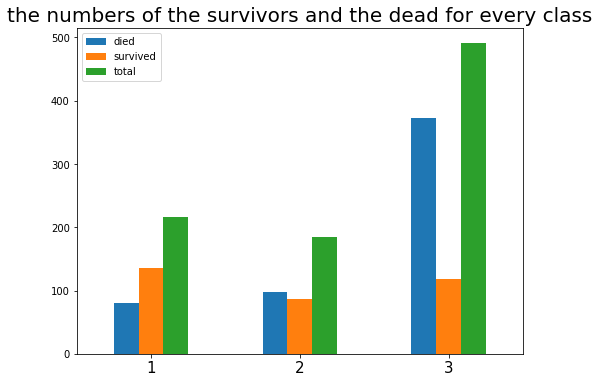

In [32]:
#making a small data frame to have the numbers that survived or died for each class plus the total number
class_sur = titanic.groupby('Survived')['Pclass'].value_counts().unstack()
class_sur = class_sur.transpose()
class_sur['total'] = class_sur.sum(axis = 1)
#making the bar graph
class_sur.plot(kind = 'bar' , figsize= (8,6))
plt.xticks(size = 15 , rotation = 0);
plt.legend(['died' , 'survived' , 'total']);
plt.xlabel("")
plt.title("the numbers of the survivors and the dead for every class" , size = 20);

## (Visualization 8)
>it appears it's highly likely to die if the passenger is 'S' Embarked . it's nealry fifty fifty if the passenger is i'Q' but it's more likely to survive if the passenger is 'C'

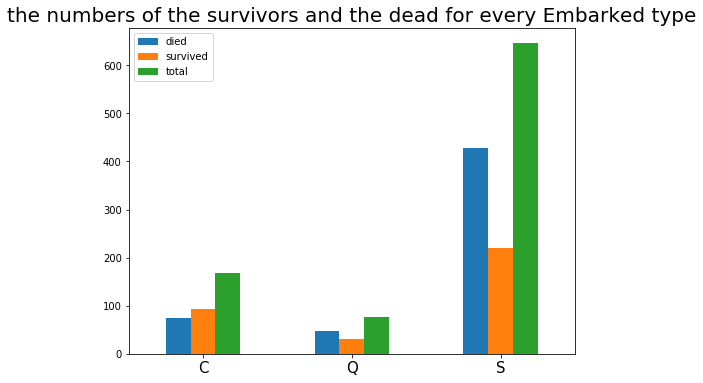

In [34]:
#making a small data frame to have the numbers that survived or died for each embarked type plus the total number
emb_sur = titanic.groupby('Survived')['Embarked'].value_counts().unstack()
emb_sur = emb_sur.transpose()
emb_sur['total'] = emb_sur.sum(axis = 1)

#making the bar graph
emb_sur.plot(kind = 'bar', figsize= (8,6))
plt.xticks(size = 15 , rotation = 0);
plt.legend(['died' , 'survived' , 'total']);
plt.xlabel("")
plt.title("the numbers of the survivors and the dead for every Embarked type" , size = 20);

## (Visualization 9)
> if the passenger has 1 sibling then it's more likely to survive but in any other case it's still more likely to die

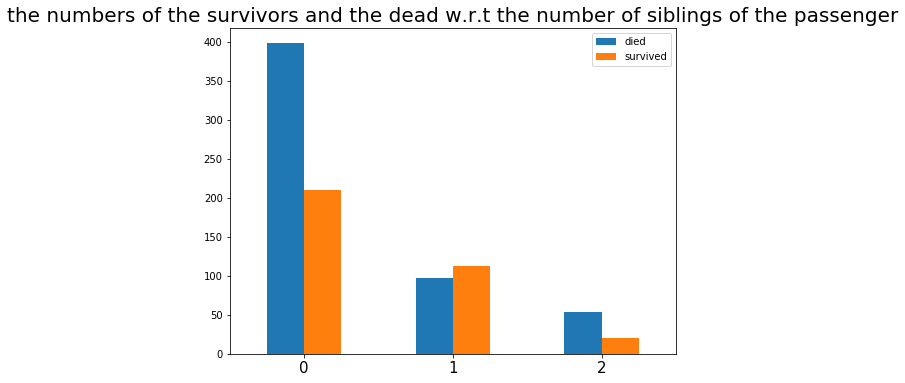

In [35]:
#since the majority of the passengers have zero or one sib so I think it will be better if we gather the sibs between 2 and 8 
#into one value equla 2

def dealwithsib(x):
    if x == 0: 
        return 0 # if the passenger has 0 sib then we will return 0
    if x == 1 :
        return 1 # if the passenger has 1 sib then we will return 1
    return 2 # if the passenger has any sibs other than 0 or 1 we will return 2

titanic['SibSp'] = titanic['SibSp'].apply(dealwithsib) #applying the function

#let's do the graph again then

#making a small data frame to have the numbers of classes for each embarked type
sib_sur = titanic.groupby('Survived')['SibSp'].value_counts().unstack()
sib_sur = sib_sur.transpose()

#making the bar graph

sib_sur.plot(kind = 'bar',figsize = (8,6))
plt.xticks(size = 15 , rotation = 0);
plt.legend(['died' , 'survived' ]);
plt.xlabel("")
plt.title("the numbers of the survivors and the dead w.r.t the number of siblings of the passenger" , size = 20);

## (Visualization 10)
in the case of males, regardless of the class, the death rate is high. but in the case of females the survival rate is massivly higher than the death rate in both the class one or two and is nearly the same at the third class. the females are the ones who dominate the survival rate at the third class that nearly no female died from the first class which is astonishing.

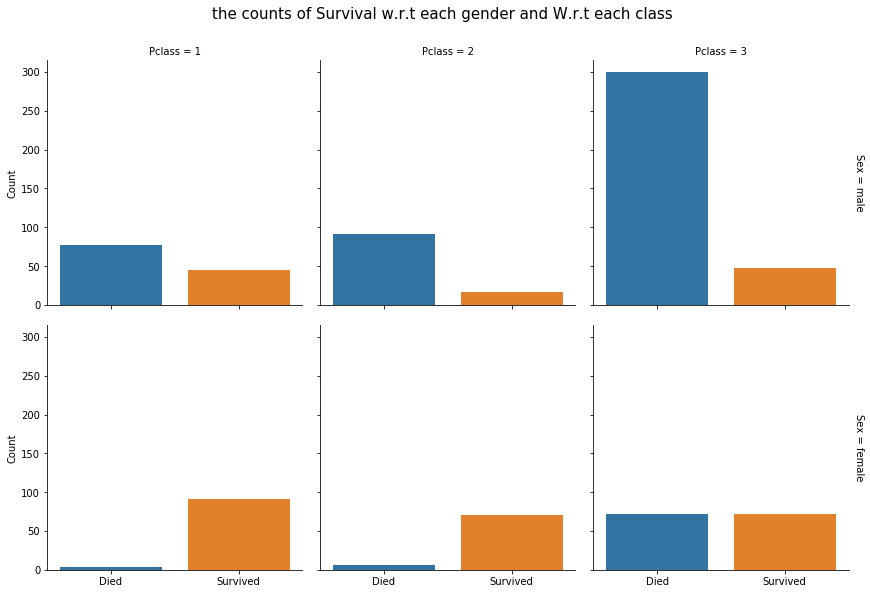

In [65]:
#creating a graph that shows the counts of Survival feature w.r.t each gender as rows and W.r.t each class as columns

g = sb.catplot("Survived", col="Pclass" ,row = 'Sex', data=titanic,kind="count", height=4, aspect=1 
               , margin_titles = True );
plt.xticks([0,1] ,['Died' ,'Survived']);

g.set_axis_labels("", "Count" );
g.fig.suptitle('the counts of Survival w.r.t each gender and W.r.t each class' ,  y =1.05 , size = 15);



### at the end, I hope my visualisations were insightful and I hope that I answered part of the big questions with these visualisations. thanks!

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!